In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import matplotlib.colors
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy.stats import linregress
from numba import njit,prange

import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.05  # previous pdf hatch linewidth

In [2]:

normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon = ds.LON[jmin:jmax,imin:imax]
lat = ds.LAT[jmin:jmax,imin:imax]

In [3]:

models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85']#,'MAR_ERA20C','MAR_ERA5']

les_origins = []
les_slopes = []
les_pvalue = []
for m,model in enumerate(models):
    print(model)
    les_season_meanT = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_meanT.npy')[:,:,jmin:jmax,imin:imax]
    origin_T=np.full(les_season_meanT.shape[1:4],np.nan)
    slope_T=np.full(les_season_meanT.shape[1:4],np.nan)
    pvalue_T=np.full(les_season_meanT.shape[1:4],np.nan)
    for i in range(les_season_meanT.shape[3]):
        # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
        for j in range(les_season_meanT.shape[2]):
            for season in range(4):
                linregress_T = linregress(np.arange(les_season_meanT.shape[0]), les_season_meanT[:,season,j,i])
                origin_T[season][j][i] = linregress_T.intercept
                slope_T[season][j][i] = linregress_T.slope
                pvalue_T[season][j][i] = linregress_T.pvalue
                
    les_origins.append(origin_T)
    les_slopes.append(slope_T)
    les_pvalue.append(pvalue_T)

MAR_MPI
MAR_ECearth3
MAR_MPI85


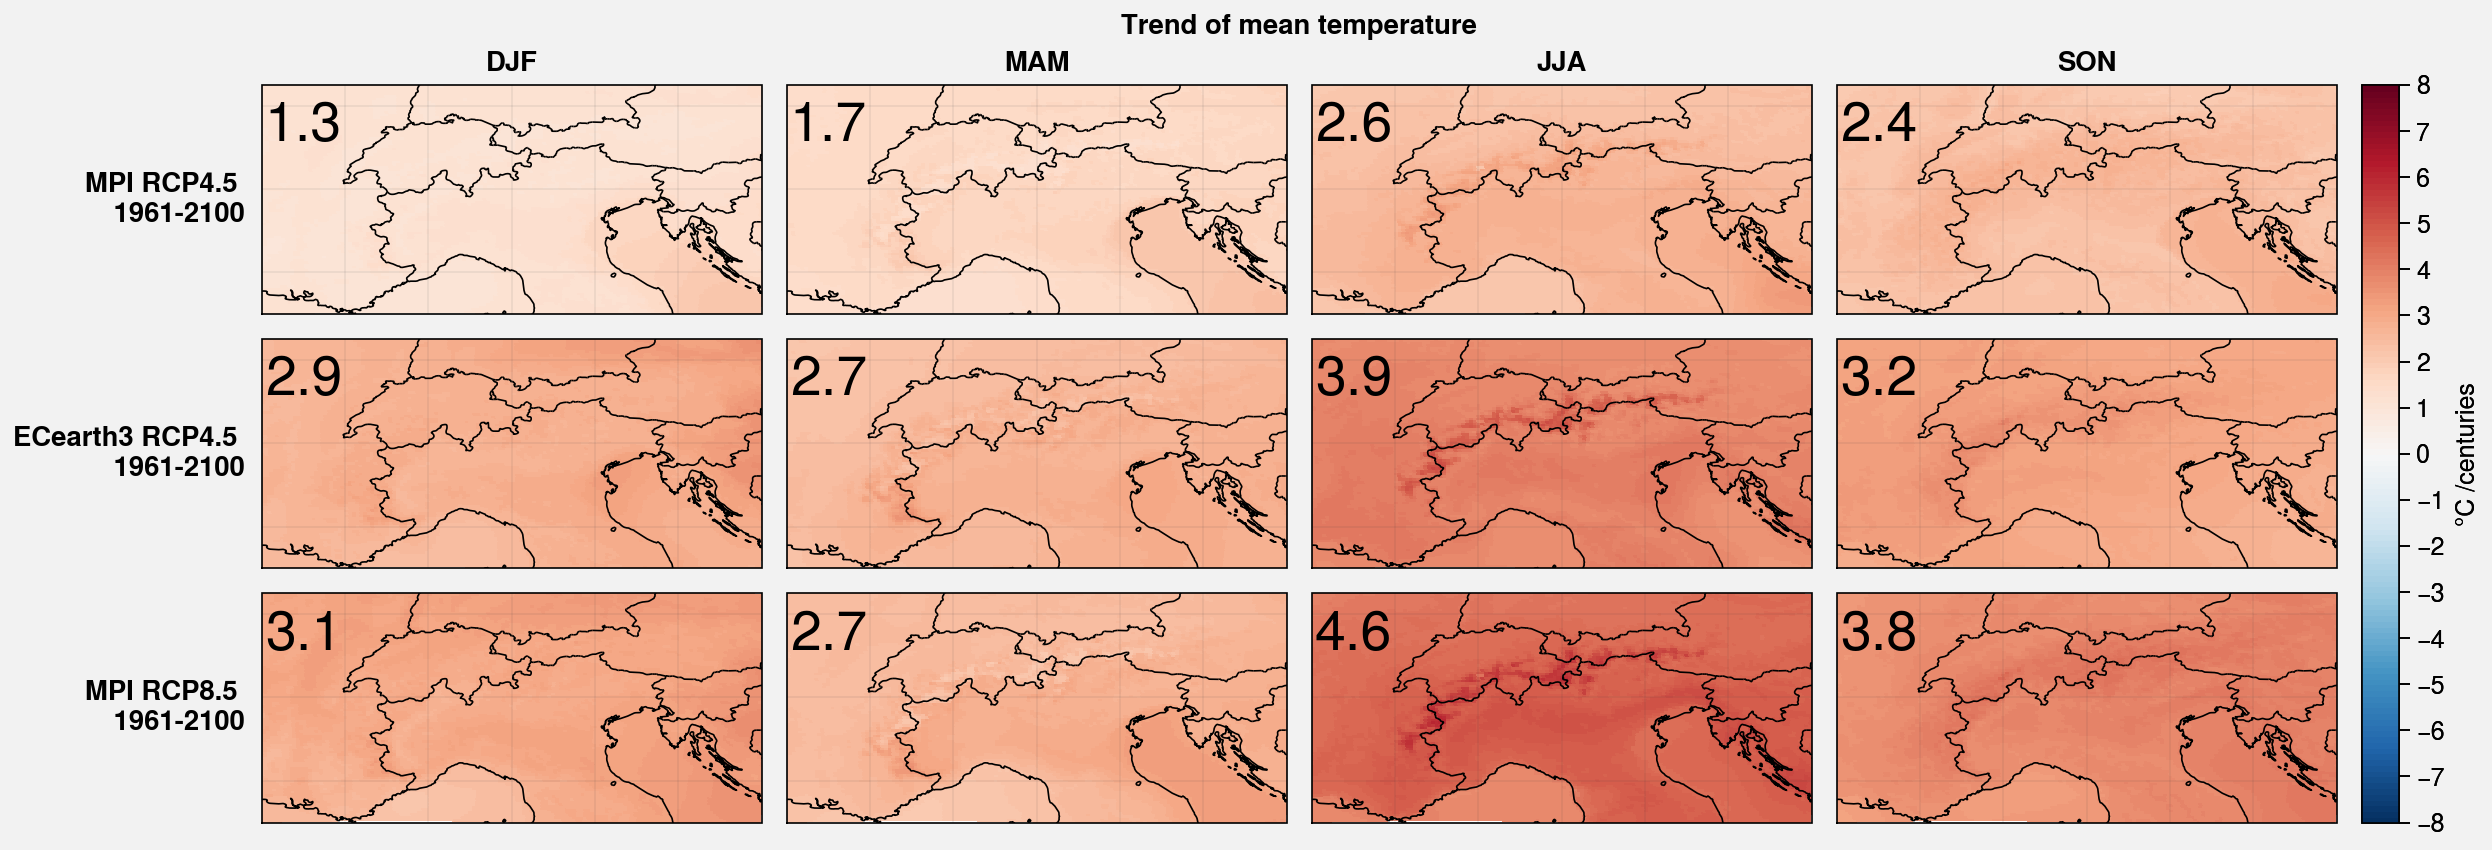

In [10]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=len(les_slopes))
for m,slopes in enumerate(les_slopes):
    for i in range(4):
        ax = axs[i+m*4]
        cb = ax.pcolormesh(lon,lat,100*slopes[i],levels=np.linspace(-8,8,129),cmap='RdBu_r')#'seismic')
        
        # signif=np.where(les_pvalue[m][i,:,:]<0.05,True,False)
        ax.text(5,47.5,"{:.1f}".format(np.mean(100*slopes[i])),ha='center',va='center',fontsize=20)
        # p = ax.contourf(lon,lat,signif,hatches=["", "...."], alpha=0.)#
        # p = ax.scatter(lon,lat,s=signif,alpha=0.5, marker='.')#
f.colorbar(cb, label= '°C /centuries',ticks=np.linspace(-8,8,17))

models = ['MPI RCP4.5 \n 1961-2100','ECearth3 RCP4.5 \n 1961-2100','MPI RCP8.5 \n 1961-2100','ERA20C \n 1902-2010','ERA5 \n 1980-2020']#,,'APGD']
axs.format(**multiplot_format,suptitle='Trend of mean temperature',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models[:len(les_slopes)])

Text(0.5, 0, 'Years')

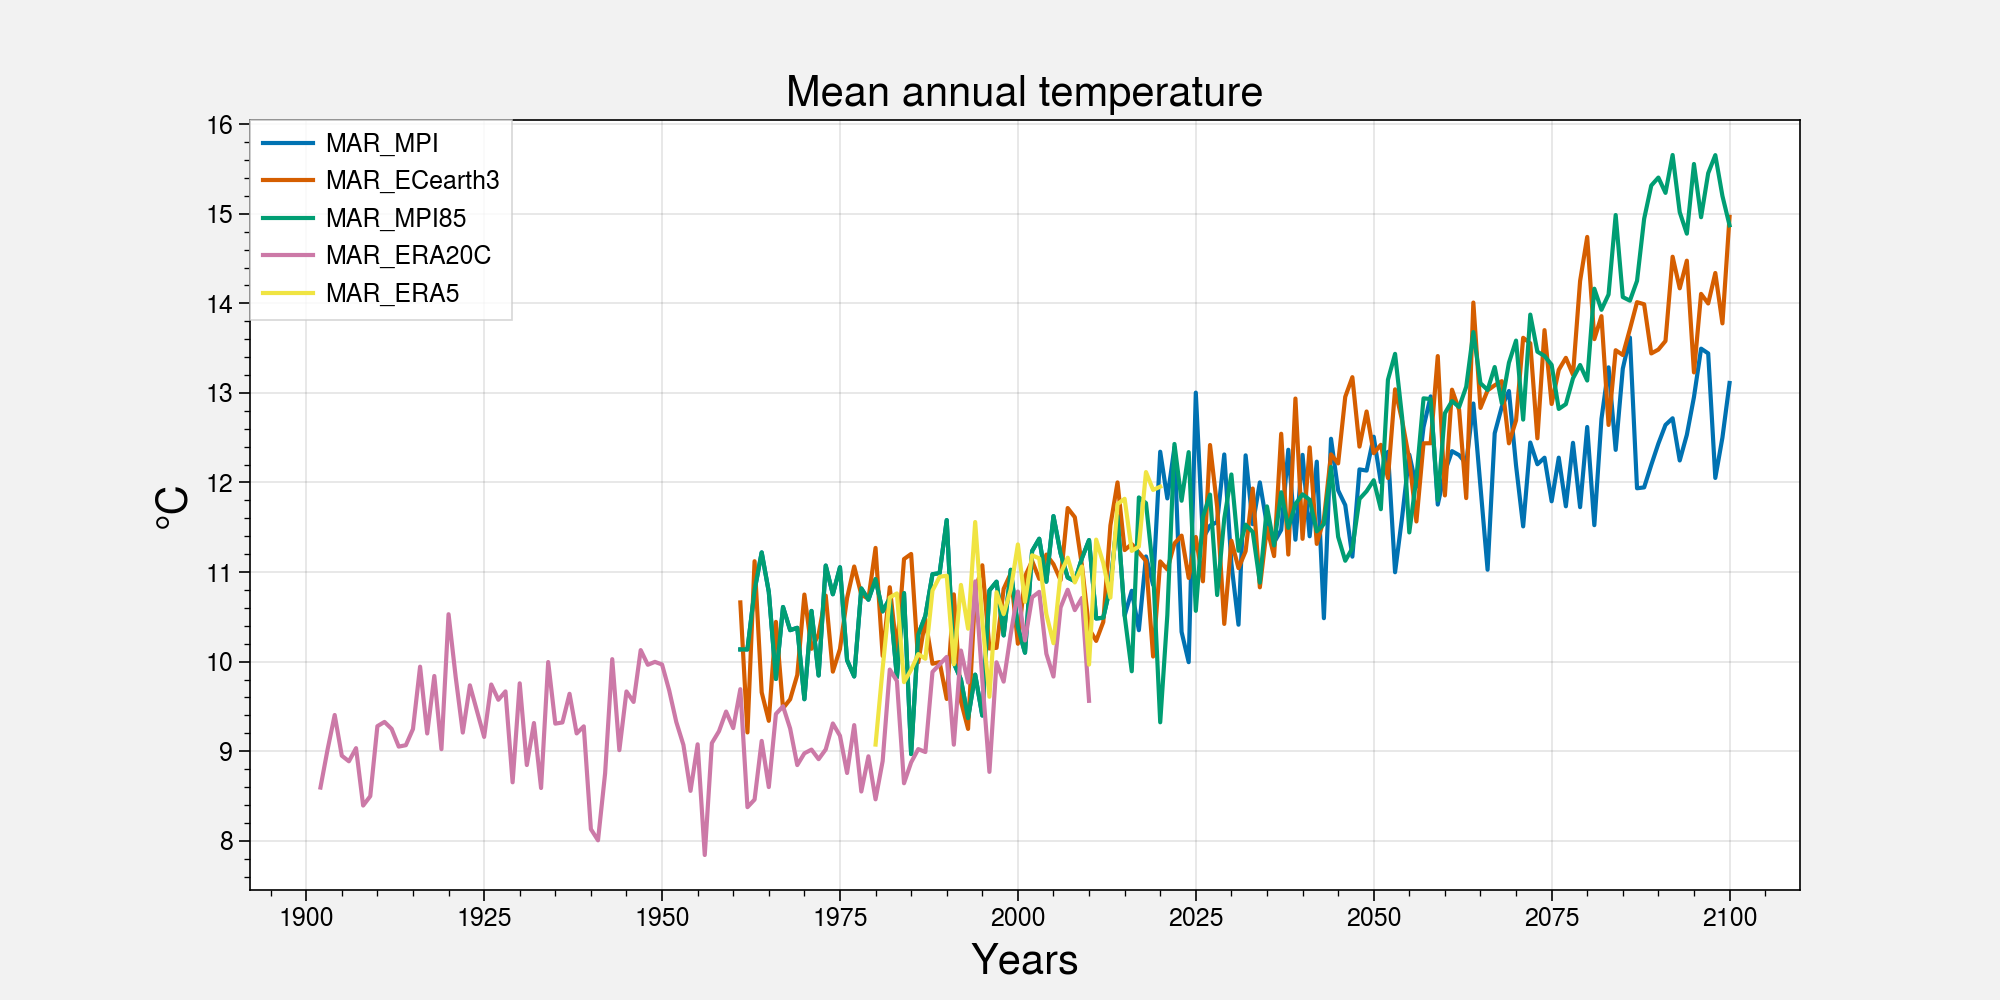

In [4]:
models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85','MAR_ERA20C','MAR_ERA5']
timelines = np.array([[1961,2100],[1961,2100],[1961,2100],[1902,2010],[1980,2020]])
plt.figure(figsize=(10,5))
for m,model in enumerate(models):
    t = np.arange(timelines[m,0],timelines[m,1]+1,1)
    meanT = np.mean(np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_meanT.npy')[:,:,jmin:jmax,imin:imax],axis=(1,2,3))
    plt.plot(t,meanT)
plt.legend(models)
plt.title('Mean annual temperature', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.xlabel('Years', fontsize=15)

Text(0.5, 0, 'Years')

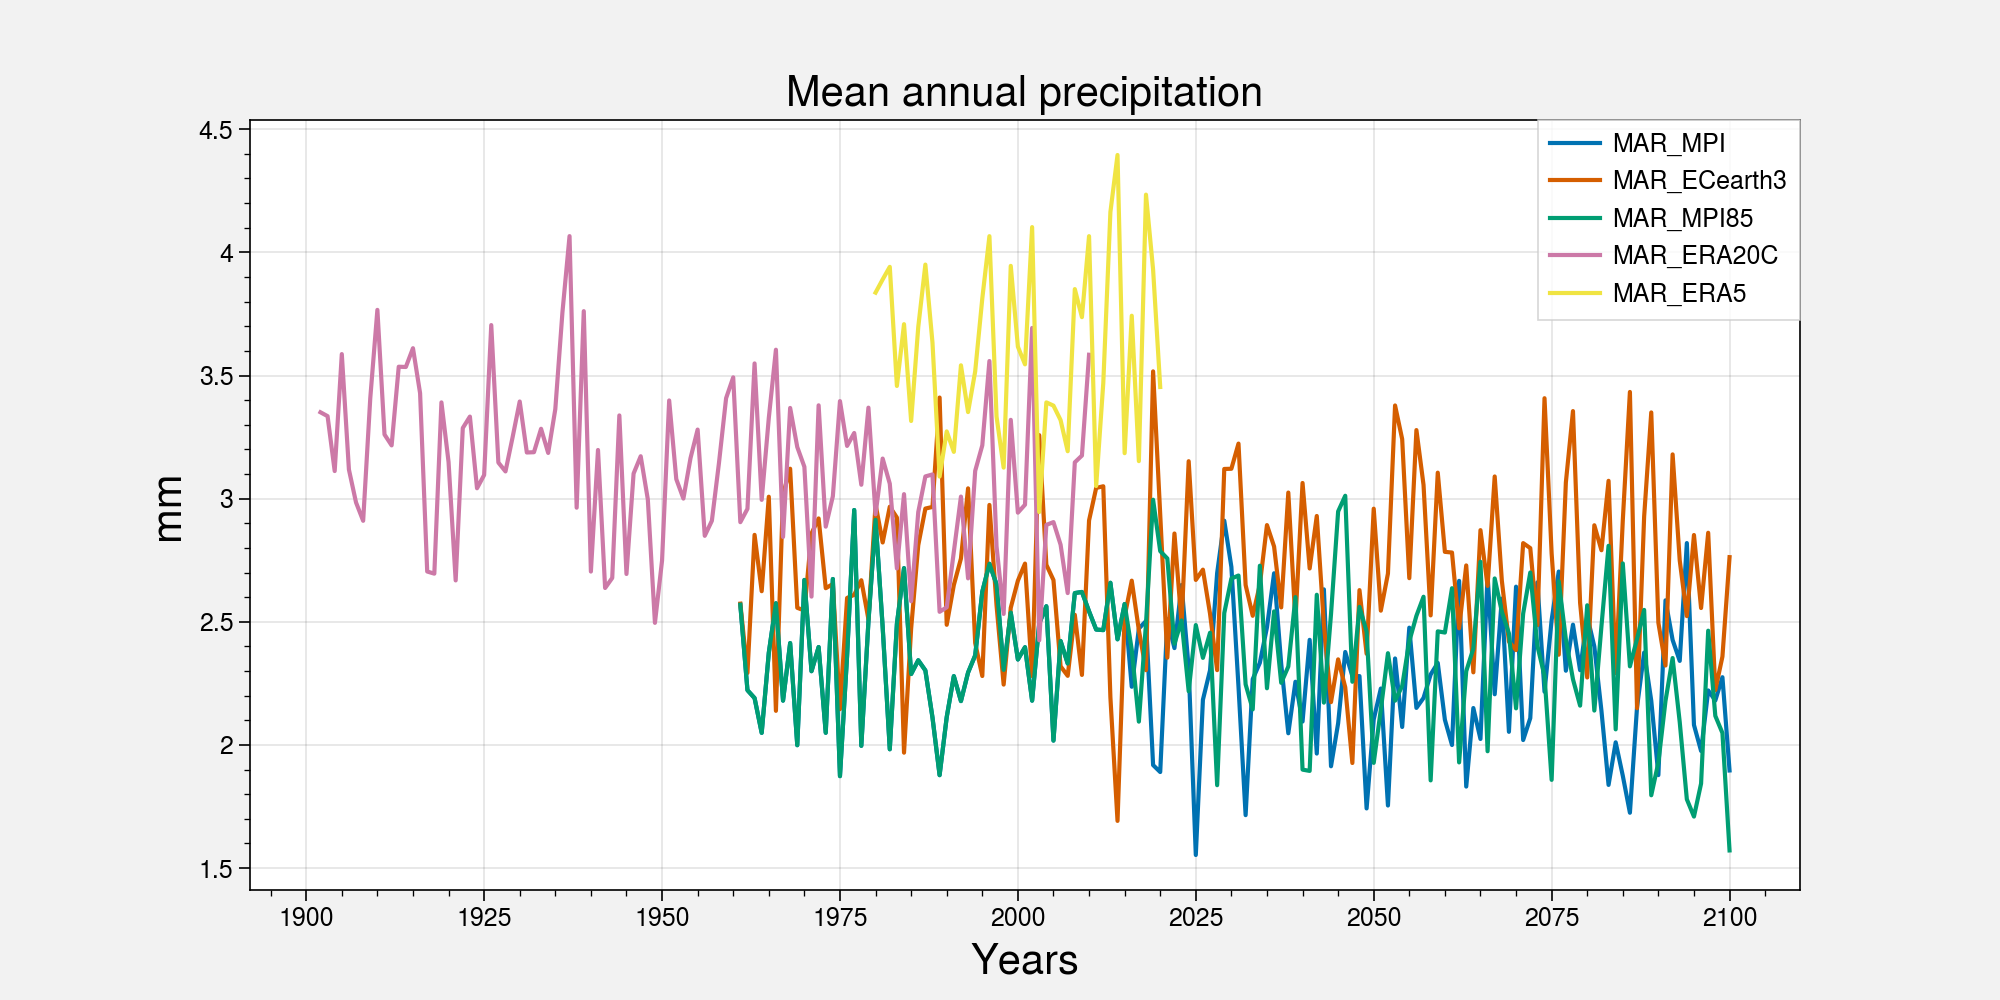

In [7]:
models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85','MAR_ERA20C','MAR_ERA5']
timelines = np.array([[1961,2100],[1961,2100],[1961,2100],[1902,2010],[1980,2020]])
plt.figure(figsize=(10,5))
for m,model in enumerate(models):
    t = np.arange(timelines[m,0],timelines[m,1]+1,1)
    meanT = np.mean(np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_mean.npy')[:,:,jmin:jmax,imin:imax],axis=(1,2,3))
    plt.plot(t,meanT)
plt.legend(models)
plt.title('Mean annual precipitation', fontsize=15)
plt.ylabel('mm', fontsize=15)
plt.xlabel('Years', fontsize=15)

(array([ 3.,  2., 12., 19., 25., 11., 18.,  9.,  3.,  7.]),
 array([ 7.84036185,  8.14587328,  8.45138471,  8.75689613,  9.06240756,
         9.36791898,  9.67343041,  9.97894183, 10.28445326, 10.58996469,
        10.89547611]),
 <a list of 10 Patch objects>)

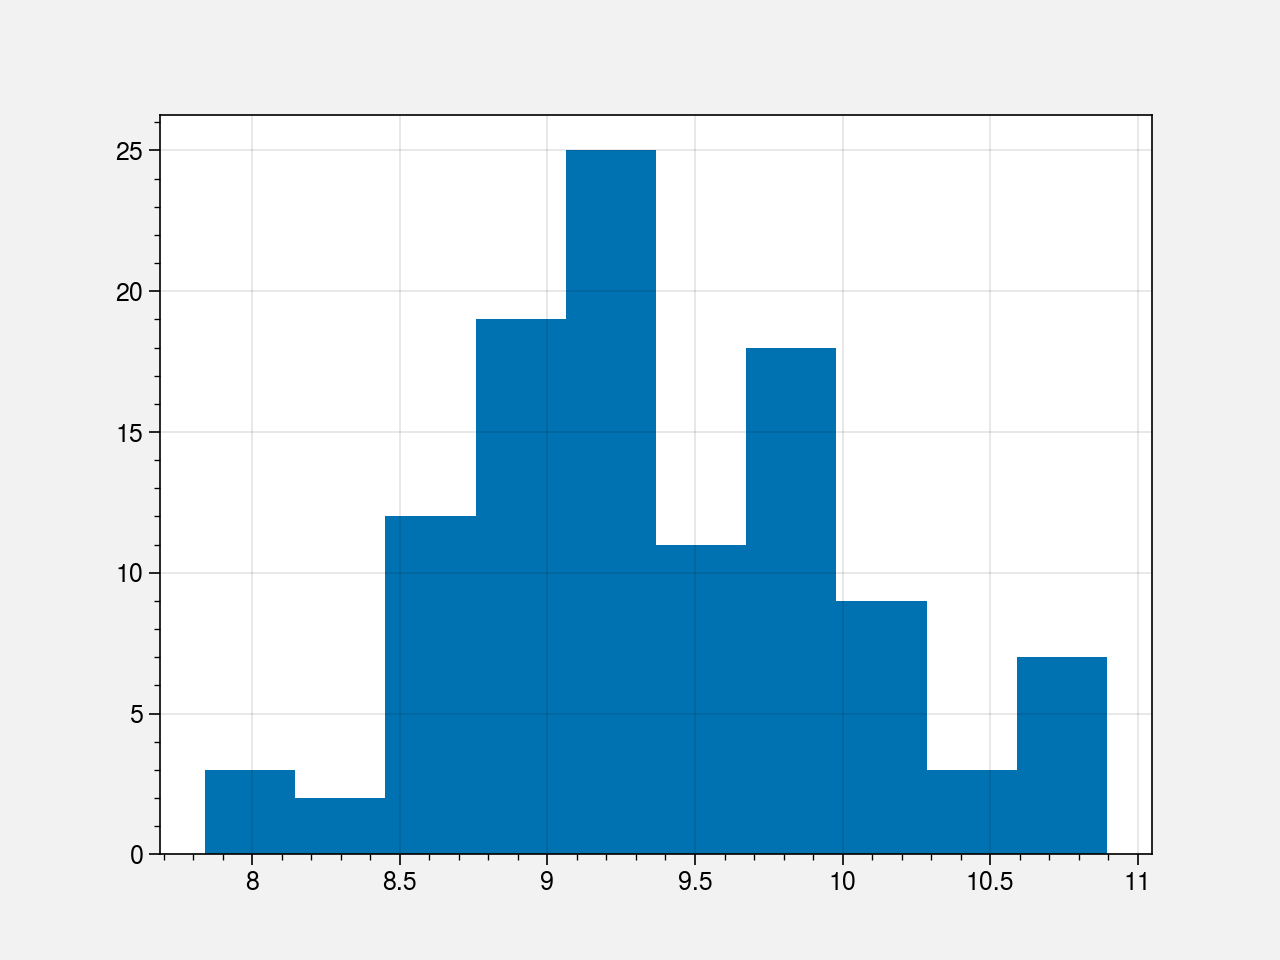

In [29]:
meanT = np.mean(np.load('/home/philinat/Stage-M2/saved_data_MAR_ERA20C/les_season_meanT.npy')[:,:,jmin:jmax,imin:imax],axis=(1,2,3))
plt.hist(meanT,)

In [13]:

# models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85','MAR_ERA20C','MAR_ERA5','APGD']
models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85','MAR_ERA20C']
# timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

les_origins = []
les_slopes = []
les_pvalue = []
for m,model in enumerate(models):
    print(model)
    les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_mean.npy')[:,:,jmin:jmax,imin:imax]
    origin_T=np.full(les_season_mean.shape[1:4],np.nan)
    slope_T=np.full(les_season_mean.shape[1:4],np.nan)
    pvalue_T=np.full(les_season_mean.shape[1:4],np.nan)
    for i in range(les_season_mean.shape[3]):
        # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
        for j in range(les_season_mean.shape[2]):
            for season in range(4):
                linregress_T = linregress(np.arange(les_season_mean.shape[0]), les_season_mean[:,season,j,i])
                origin_T[season][j][i] = linregress_T.intercept
                slope_T[season][j][i] = linregress_T.slope
                pvalue_T[season][j][i] = linregress_T.pvalue
                
    les_origins.append(origin_T)
    les_slopes.append(slope_T)
    les_pvalue.append(pvalue_T)

MAR_MPI
MAR_ECearth3
MAR_MPI85
MAR_ERA20C


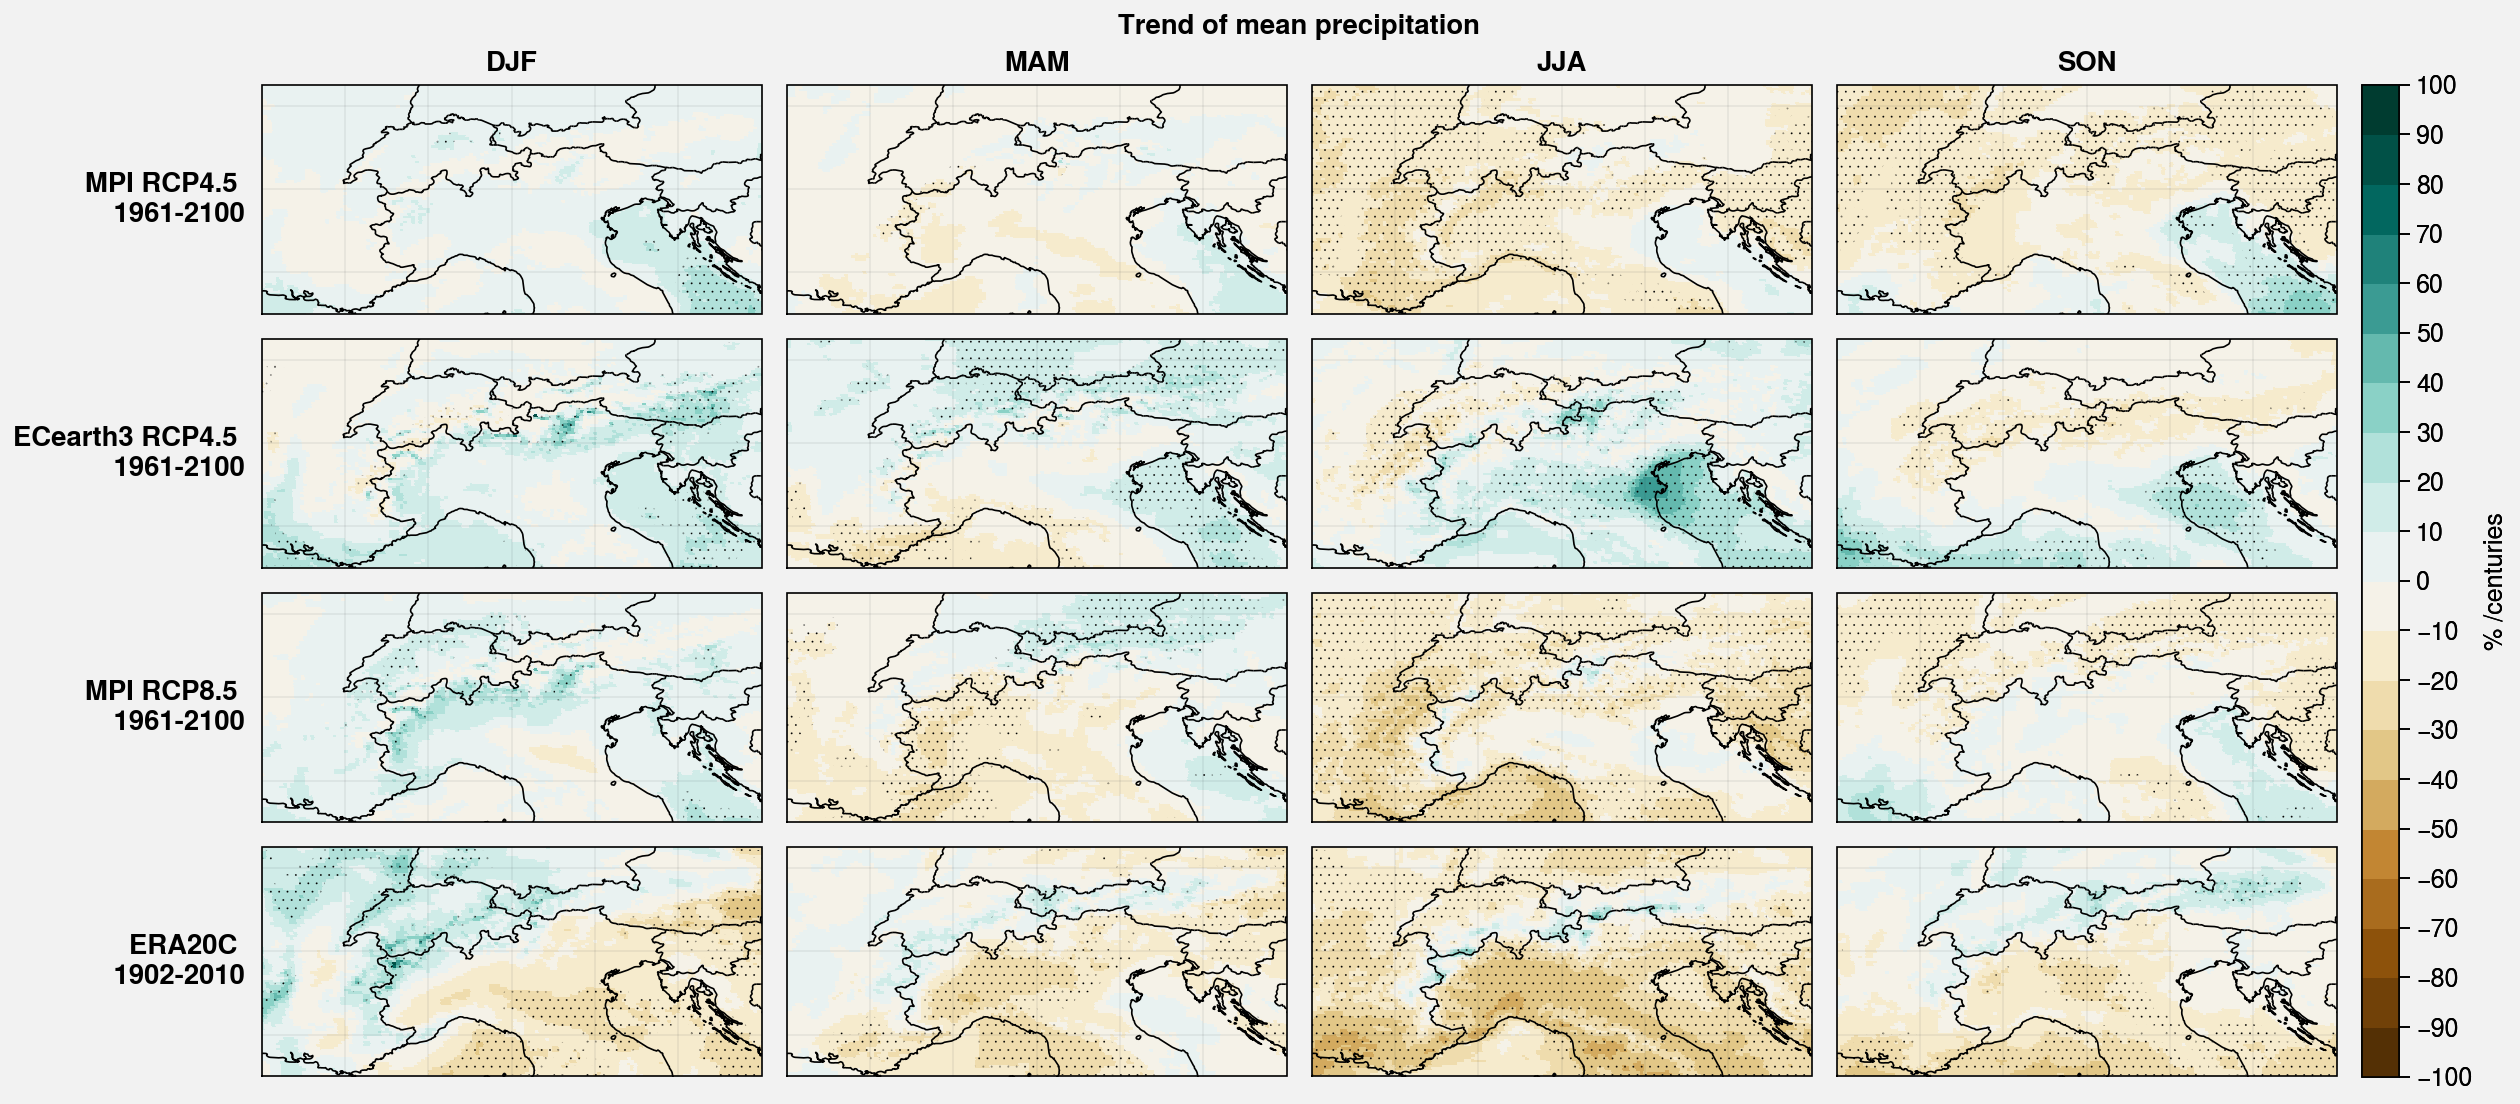

In [15]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4)
for m,slopes in enumerate(les_slopes[:4]):
    for i in range(4):
        ax = axs[i+m*4]
        cb = ax.pcolormesh(lon,lat,100*100*slopes[i]/les_origins[m][i],levels=np.linspace(-100,100,21),cmap='BrBg')
        
        signif=np.where(les_pvalue[m][i,:,:]<0.05,True,False)
        p = ax.contourf(lon,lat,signif,hatches=["", "...."], alpha=0.)#
        # p = ax.scatter(lon,lat,s=signif,alpha=0.5, marker='.')#
f.colorbar(cb, label= '% /centuries')

models = ['MPI RCP4.5 \n 1961-2100','ECearth3 RCP4.5 \n 1961-2100','MPI RCP8.5 \n 1961-2100','ERA20C \n 1902-2010','ERA5 \n 1980-2020','APGD \n 1971-2008']
axs.format(**multiplot_format,suptitle='Trend of mean precipitation',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models[:4])

In [ ]:
##### Test linear regression on extremes #####

In [5]:

models = ['MAR_MPI','MAR_ECearth3','MAR_MPI85','MAR_ERA20C','MAR_ERA5','APGD']
# timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

les_origins = []
les_slopes = []
les_pvalue = []
for m,model in enumerate(models):
    print(model)
    les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_max.npy')[:,:,jmin:jmax,imin:imax]
    origin_T=np.full(les_season_mean.shape[1:4],np.nan)
    slope_T=np.full(les_season_mean.shape[1:4],np.nan)
    pvalue_T=np.full(les_season_mean.shape[1:4],np.nan)
    for i in range(les_season_mean.shape[3]):
        # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
        for j in range(les_season_mean.shape[2]):
            for season in range(4):
                linregress_T = linregress(np.arange(les_season_mean.shape[0]), les_season_mean[:,season,j,i])
                origin_T[season][j][i] = linregress_T.intercept
                slope_T[season][j][i] = linregress_T.slope
                pvalue_T[season][j][i] = linregress_T.pvalue
                
    les_origins.append(origin_T)
    les_slopes.append(slope_T)
    les_pvalue.append(pvalue_T)

MAR_MPI
MAR_ECearth3
MAR_MPI85
MAR_ERA20C
MAR_ERA5
APGD


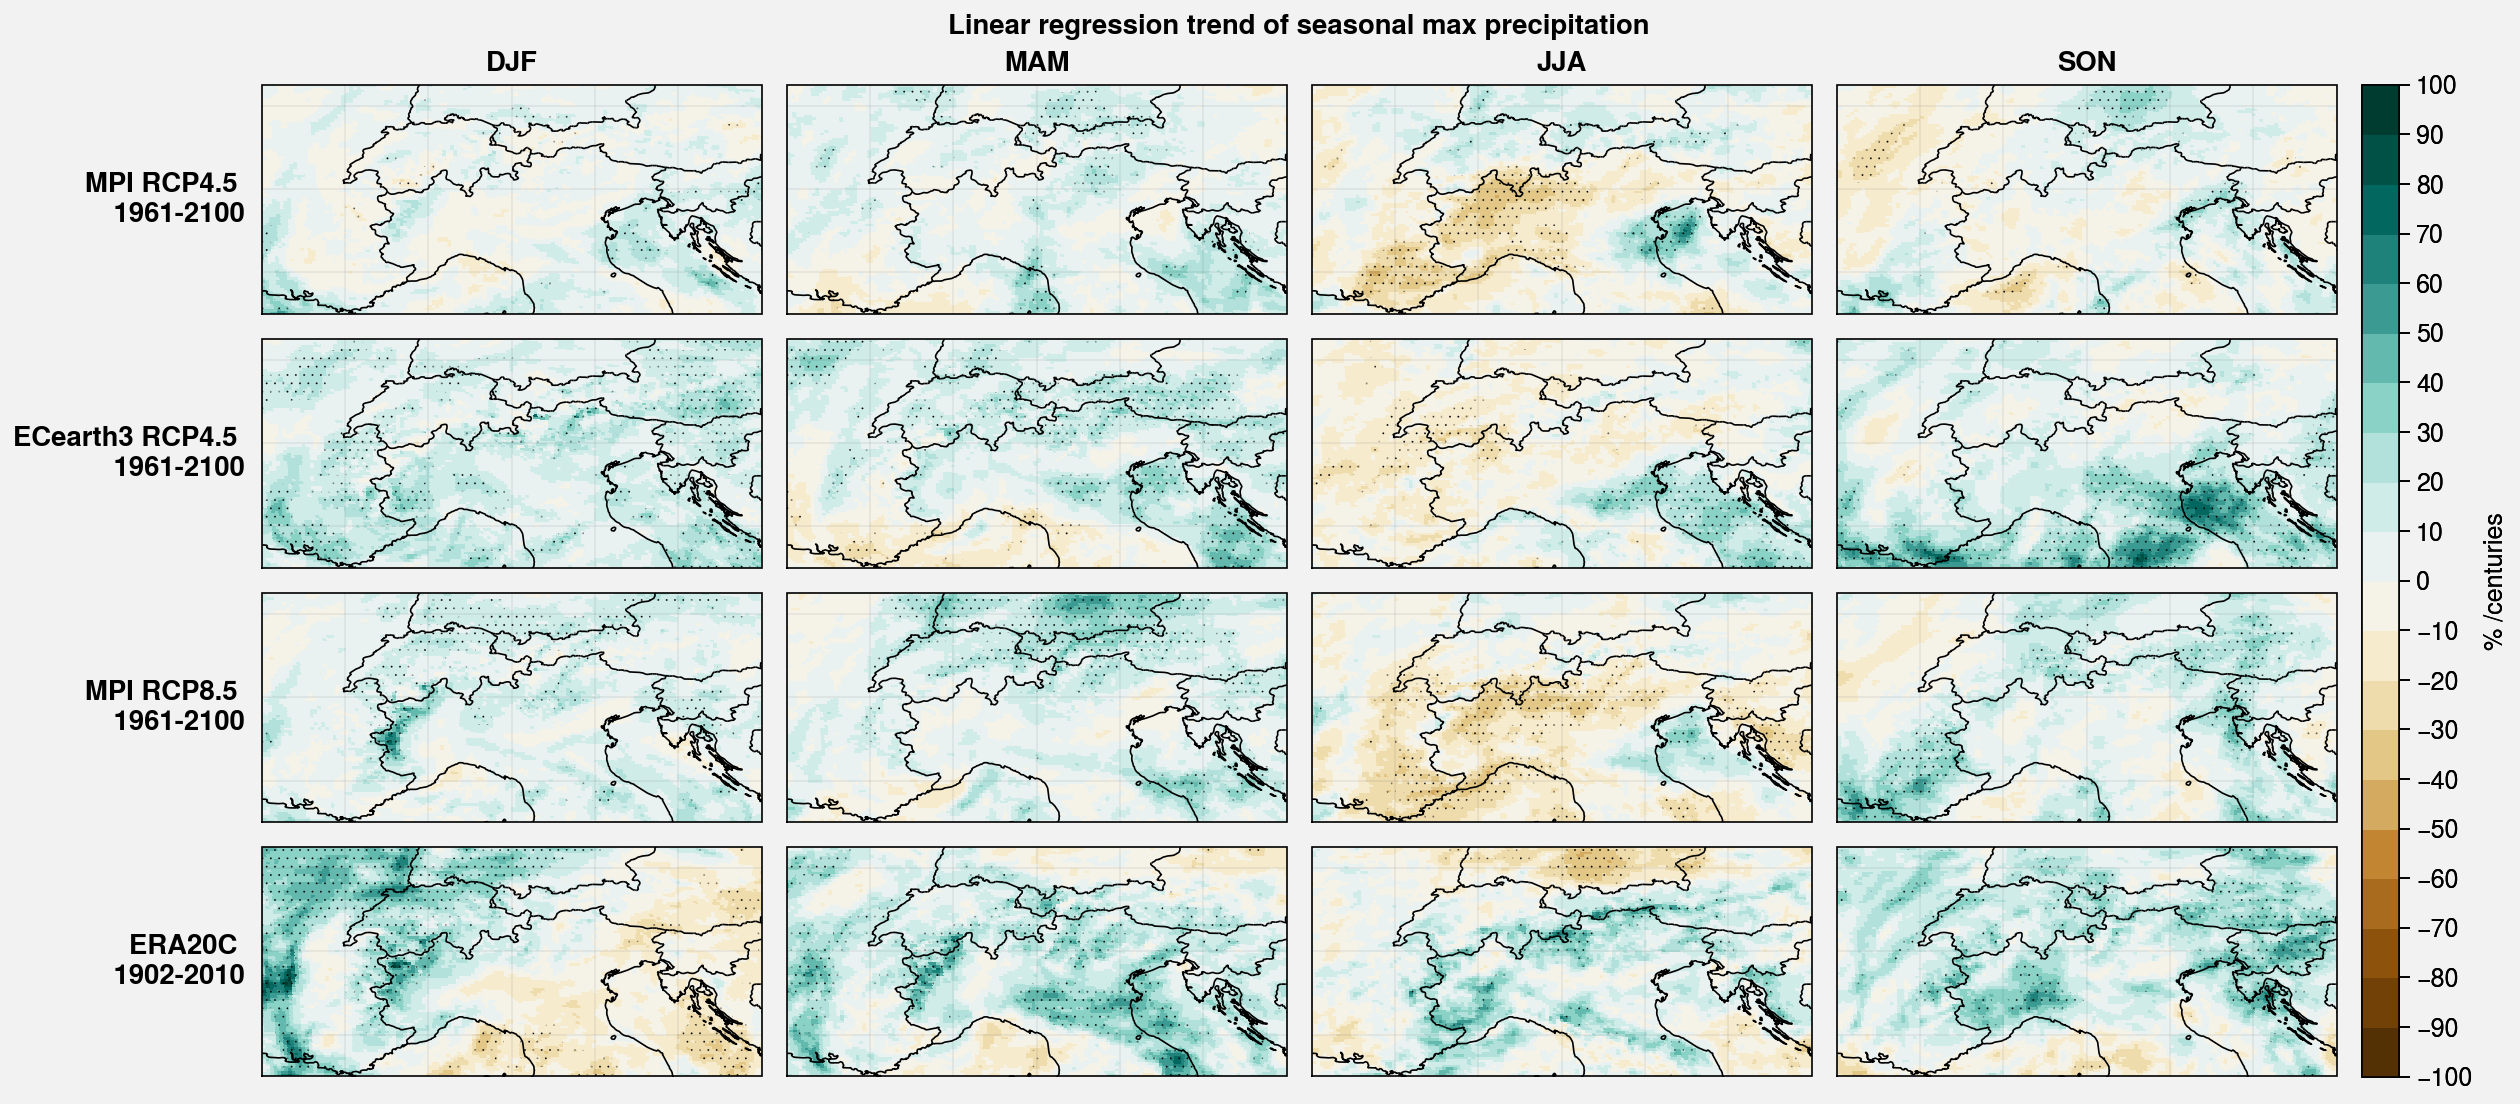

In [12]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4)
for m,slopes in enumerate(les_slopes[:4]):
    for i in range(4):
        ax = axs[i+m*4]
        cb = ax.pcolormesh(lon,lat,100*100*slopes[i]/les_origins[m][i],levels=np.linspace(-100,100,21),cmap='BrBg')
        
        signif=np.where(les_pvalue[m][i,:,:]<0.05,True,False)
        p = ax.contourf(lon,lat,signif,hatches=["", "...."], alpha=0.)#
        # p = ax.scatter(lon,lat,s=signif,alpha=0.5, marker='.')#
f.colorbar(cb, label= '% /centuries')

models = ['MPI RCP4.5 \n 1961-2100','ECearth3 RCP4.5 \n 1961-2100','MPI RCP8.5 \n 1961-2100','ERA20C \n 1902-2010','ERA5 \n 1980-2020','APGD \n 1971-2008']
axs.format(**multiplot_format,suptitle='Linear regression trend of seasonal max precipitation',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models[:4])